# Compare Cell Types

In [13]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
print(ad.__version__)

0.11.4


In [14]:
# There are 9 excel files in the folder results
# The excel files have two collumns: 'Gene' and 'Number of Significant Differences'

# The excel files are named: "results/{}_significant_differences.xlsx".format(cell_type)
cell_types = [
    "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    "double negative T regulatory cell",
    "innate lymphoid cell"
]

# Load all the excel files into separate dictionaries
excel_files = {}

for cell_type in cell_types:
    file_path = f"results/network/young_old//{cell_type}_significant_differences.xlsx"
    excel_files[cell_type] = pd.read_excel(file_path)
    

In [15]:
# Print the top 10 rows of each dataframe
for cell_type, df in excel_files.items():
    print(f"Top 10 rows for {cell_type}:")
    print(df.head(10))
    print("\n")



Top 10 rows for CD8-positive, alpha-beta T cell:
              Gene  Number of Significant Differences
0  ENSG00000101608                                138
1  ENSG00000159388                                125
2  ENSG00000010404                                125
3  ENSG00000124614                                114
4  ENSG00000128340                                108
5  ENSG00000109971                                107
6  ENSG00000136490                                106
7  ENSG00000157514                                106
8  ENSG00000173812                                105
9  ENSG00000139193                                102


Top 10 rows for CD8-positive, alpha-beta memory T cell:
              Gene  Number of Significant Differences
0  ENSG00000122026                                297
1  ENSG00000177954                                288
2  ENSG00000124942                                279
3  ENSG00000145592                                273
4  ENSG00000137076           

In [16]:
# Load all the excel files of the same cell type
# The excel files have 6 columns: 'Gene1' and 'Gene2', 'Correlation Difference', 'Correlation Young', 'Correlation Middle', 'Correlation Old'

excel_files_top_diff_genes = {}

for cell_type in cell_types:
    file_path = f"results/{cell_type}_top_diff_genes.xlsx"
    excel_files_top_diff_genes[cell_type] = pd.read_excel(file_path)


In [17]:
# Print the regular T cell file
print(excel_files_top_diff_genes["CD4-positive, alpha-beta T cell"].head(10).to_string(index=False))

          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000104660 ENSG00000197111                0.941815          -0.371038           -0.008649         0.570777
ENSG00000197111 ENSG00000104660                0.941815          -0.371038           -0.008649         0.570777
ENSG00000147604 ENSG00000197111                0.937499          -0.352208            0.111207         0.585291
ENSG00000197111 ENSG00000147604                0.937499          -0.352208            0.111207         0.585291
ENSG00000125691 ENSG00000197111                0.935570          -0.404992            0.034008         0.530578
ENSG00000197111 ENSG00000125691                0.935570          -0.404992            0.034008         0.530578
ENSG00000116824 ENSG00000099860                0.901299           0.573757            0.294734        -0.327542
ENSG00000099860 ENSG00000116824                0.901299           0.573757            0.294734        -0

In [18]:
# Create a new dictionary where we add all the significant differences for each cell type
# all_significant_differences = {} gene: number of significant differences
all_significant_differences = {}
for cell_type, df in excel_files.items():
    for index, row in df.iterrows():
        gene = row['Gene']
        number_of_differences = row['Number of Significant Differences']
        
        if gene not in all_significant_differences:
            all_significant_differences[gene] = 0
            
        all_significant_differences[gene] += number_of_differences

# Sort the dictionary by number of significant differences
sorted_significant_differences = sorted(all_significant_differences.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame
df_significant_differences = pd.DataFrame(sorted_significant_differences, columns=['Gene', 'Number of Significant Differences'])

In [19]:
# print the top 10 genes with the most significant differences
print("=== Top 10 Genes with the Most Significant Differences ===")
print(df_significant_differences.head(10).to_string(index=False))

=== Top 10 Genes with the Most Significant Differences ===
           Gene  Number of Significant Differences
ENSG00000124614                               1618
ENSG00000177954                               1605
ENSG00000145592                               1529
ENSG00000241343                               1494
ENSG00000122026                               1490
ENSG00000197111                               1480
ENSG00000146278                               1375
ENSG00000100345                               1353
ENSG00000196924                               1345
ENSG00000124942                               1337


C:\Users\Tycho\AppData\Local\Temp\ipykernel_32220\3869291238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


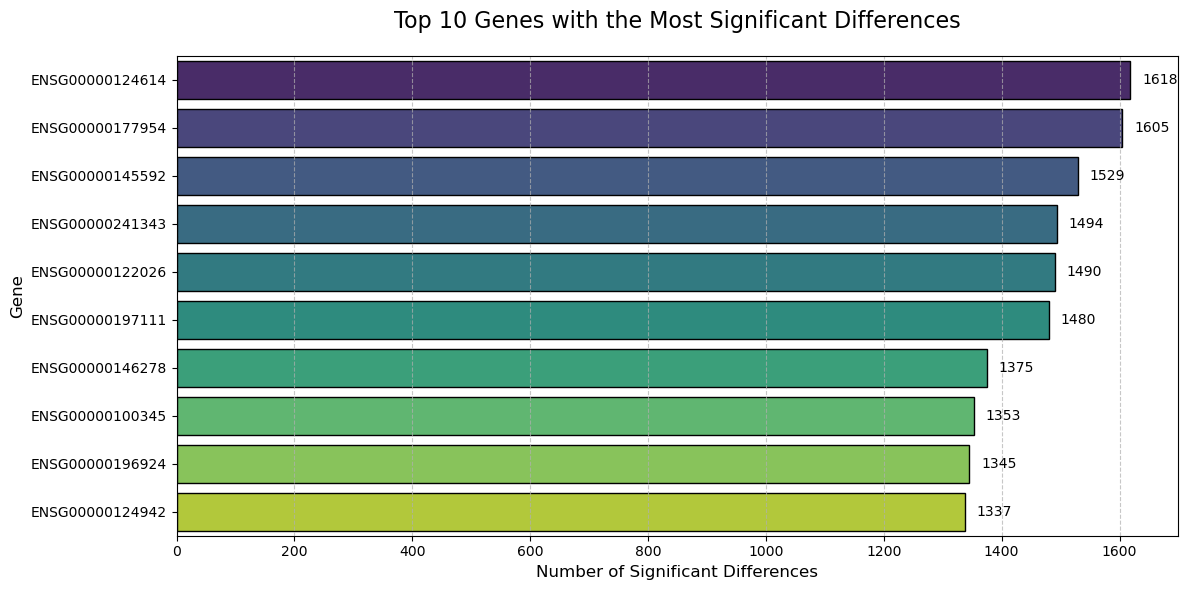

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named `df_significant_differences`
top_10 = df_significant_differences.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Number of Significant Differences', 
    y='Gene', 
    data=top_10,
    palette='viridis',  # Use any palette you like (e.g., 'magma', 'plasma')
    edgecolor='black'
)

# Customize the plot
plt.title('Top 10 Genes with the Most Significant Differences', fontsize=16, pad=20)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for i, value in enumerate(top_10['Number of Significant Differences']):
    plt.text(value + 20, i, f'{value}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [21]:
# Test if the pareto principle applies
# Calculate the cumulative sum of significant differences
total = df_significant_differences['Number of Significant Differences'].cumsum()

int_twenty = int(0.2 * len(df_significant_differences)) - 1
print(f"Total number of significant differences: {total.iloc[-1]}")
print(f"Total number of significant differences in the top 20%: {total[int_twenty]}")
print(f"Percentage of significant differences in the top 20%: {(total[int_twenty] / total.iloc[-1]) * 100:.2f}%")
print(f"Total number of genes: {len(df_significant_differences)}")

Total number of significant differences: 332886
Total number of significant differences in the top 20%: 172960
Percentage of significant differences in the top 20%: 51.96%
Total number of genes: 950


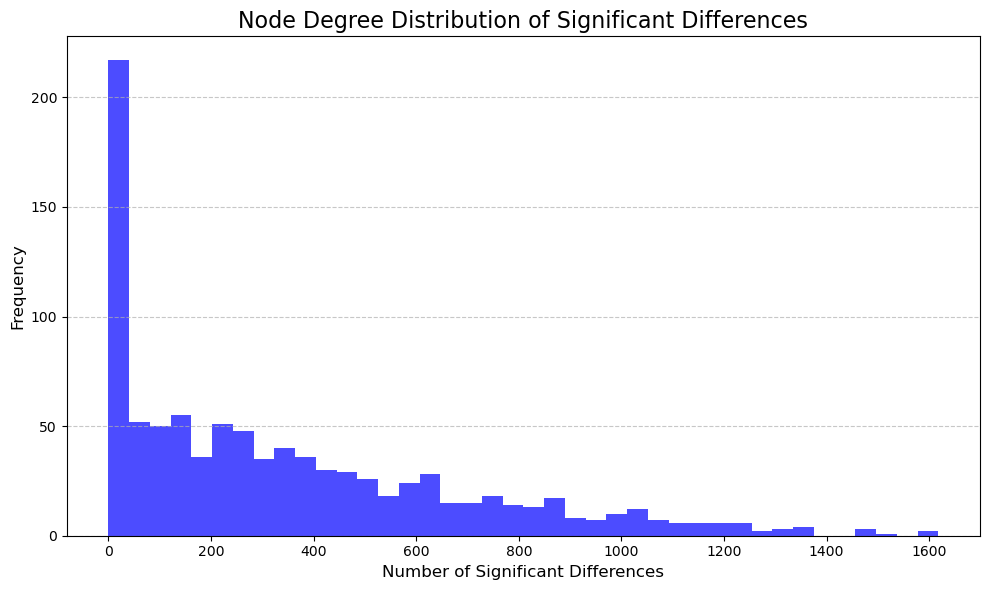

In [22]:
# Plot a node degree distribution for df_significant_differences
plt.figure(figsize=(10, 6))
plt.hist(df_significant_differences['Number of Significant Differences'], bins=40, color='blue', alpha=0.7)
plt.title('Node Degree Distribution of Significant Differences', fontsize=16)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Find the correlation differences for the target genes in all cell types
target_gene = "ENSG00000118503"
target_gene2 = "ENSG00000153234"

correlation_differences = pd.DataFrame(columns=['Cell Type', 'Gene1', 'Gene2', 'Correlation Difference', 'Correlation Young', 'Correlation Middle', 'Correlation Old'])
for cell_type, df in excel_files_top_diff_genes.items():
    if target_gene in df['Gene1'].values or target_gene in df['Gene2'].values:
        # Filter the DataFrame for the target gene
        filtered_df = df[(df['Gene1'] == target_gene) & (df['Gene2'] == target_gene2)]
        for index, row in filtered_df.iterrows():
            correlation_differences = pd.concat([correlation_differences, pd.DataFrame({
                'Cell Type': [cell_type],
                'Gene1': [row['Gene1']],
                'Gene2': [row['Gene2']],
                'Correlation Difference': [row['Correlation Difference']],
                'Correlation Young': [row['Correlation Young']],
                'Correlation Middle': [row['Correlation Middle']],
                'Correlation Old': [row['Correlation Old']]
            })], ignore_index=True)

In [27]:
# Print the correlation differences for the target gene
print(f"=== Correlation Differences for {target_gene} ===")
print(correlation_differences.to_string(index=False))

# Save the correlation differences to a CSV file
path = f"results/correlation_differences_{target_gene}_{target_gene2}.csv"
correlation_differences.to_csv(path, index=False)

=== Correlation Differences for ENSG00000118503 ===
                                      Cell Type           Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
                CD8-positive, alpha-beta T cell ENSG00000118503 ENSG00000153234                0.446409           0.880281            0.679652         0.433872
         CD8-positive, alpha-beta memory T cell ENSG00000118503 ENSG00000153234                0.075396           0.974940            0.956610         0.899544
                CD4-positive, alpha-beta T cell ENSG00000118503 ENSG00000153234                0.171072           0.934698            0.923832         0.763627
 central memory CD4-positive, alpha-beta T cell ENSG00000118503 ENSG00000153234                0.059109           0.966470            0.944984         0.907360
effector memory CD4-positive, alpha-beta T cell ENSG00000118503 ENSG00000153234                0.102156           0.967387            0.935880      

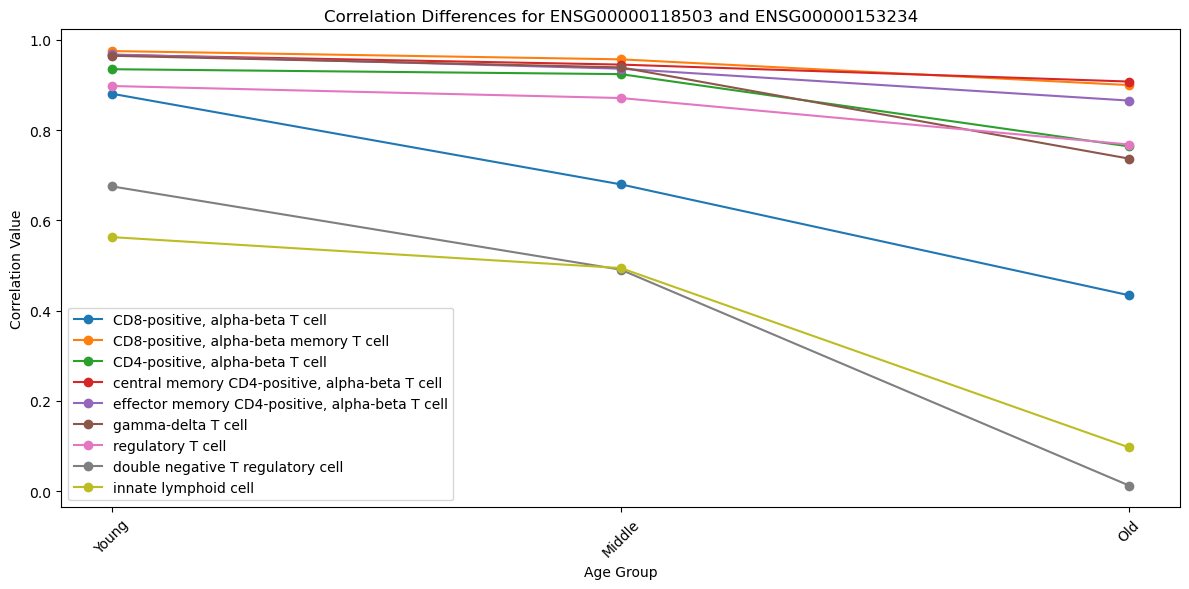

In [28]:
# A line plot of the correlation differences for the target gene a different line for each cell type from young, middle, old
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loop over each cell type and add a line from young, middle, old this is the x-axis
for cell_type in correlation_differences['Cell Type'].unique():
    subset = correlation_differences[correlation_differences['Cell Type'] == cell_type]
    plt.plot(['Young', 'Middle', 'Old'], 
             [subset['Correlation Young'].values[0], 
              subset['Correlation Middle'].values[0], 
              subset['Correlation Old'].values[0]], 
             marker='o', label=cell_type)
plt.title(f'Correlation Differences for {target_gene} and {target_gene2}')
plt.xlabel('Age Group')
plt.ylabel('Correlation Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Horizontal legend saved as 'correlation_legend_horizontal.png'


C:\Users\Tycho\AppData\Local\Temp\ipykernel_32220\1900930065.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')
C:\Users\Tycho\AppData\Local\Temp\ipykernel_32220\1900930065.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Y', 'M', 'O'], fontsize=6)  # Shortened labels


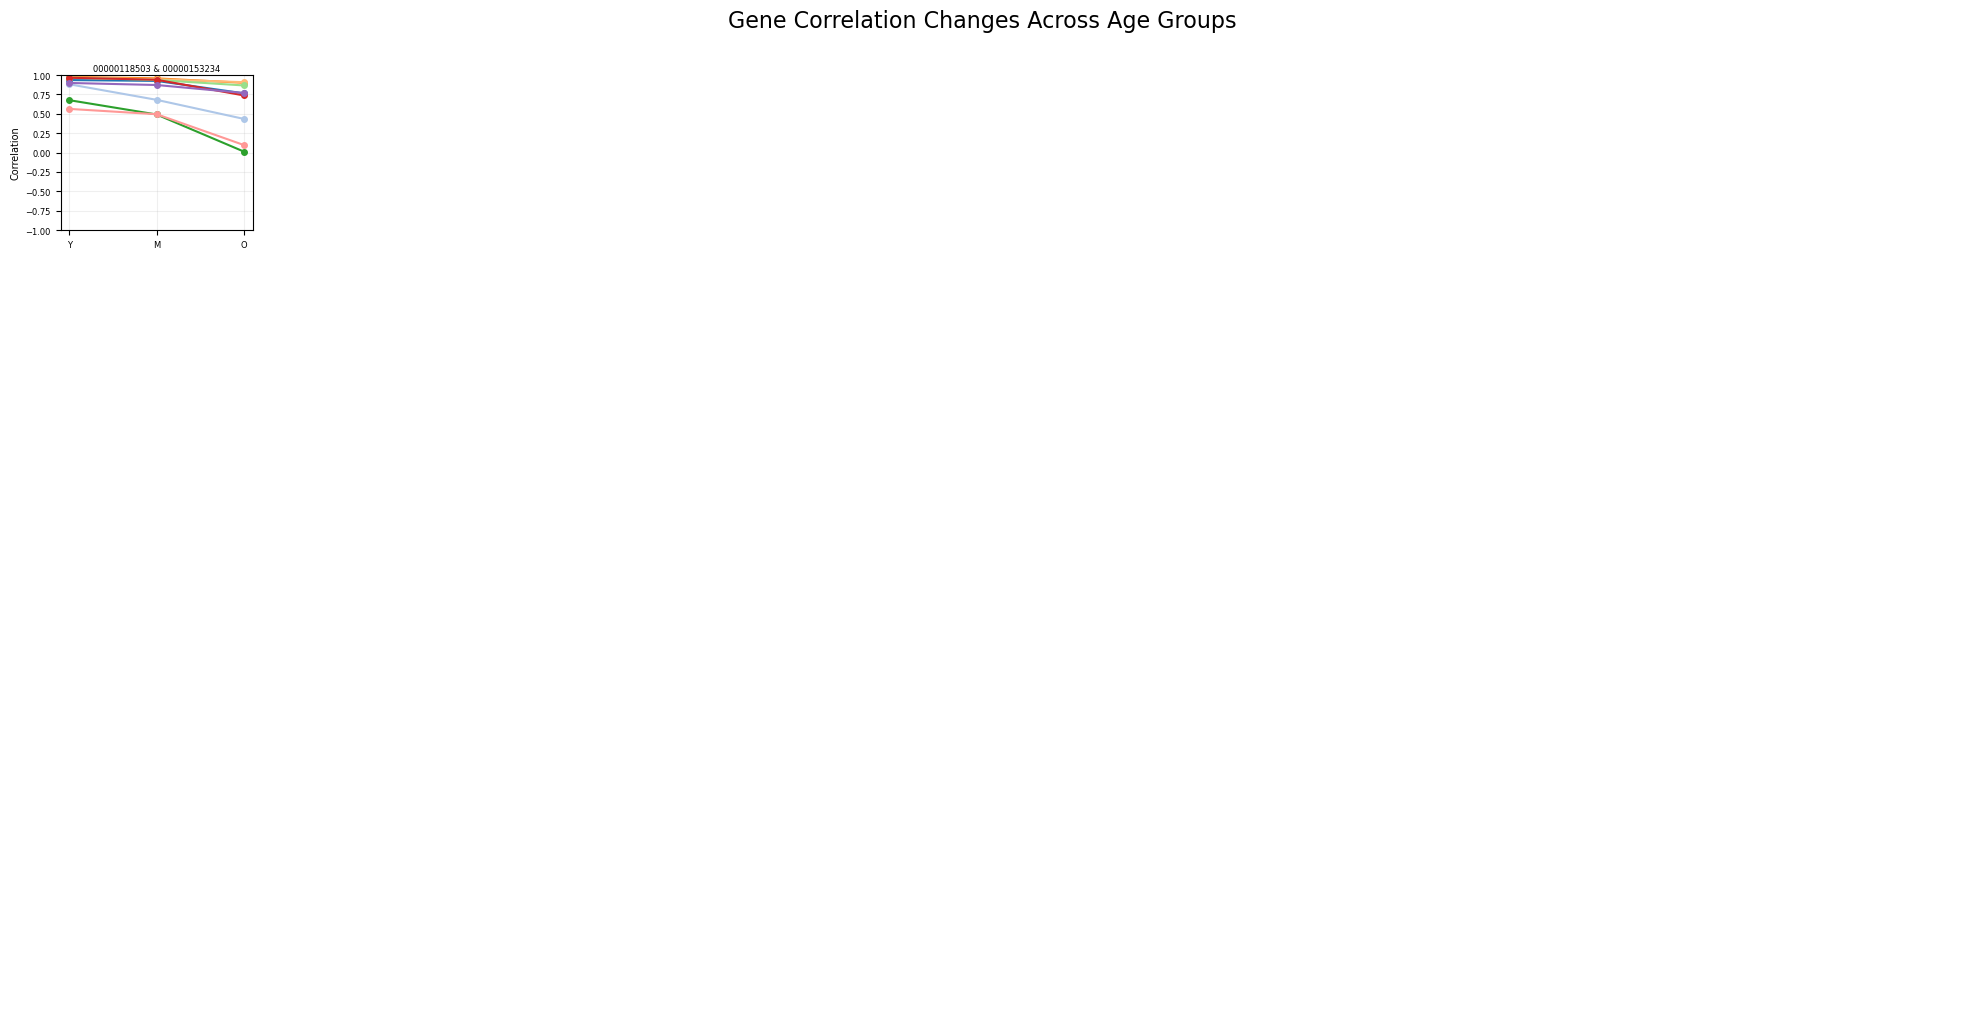

Main plot saved as 'gene_correlations_slide.png'


In [ ]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# First create a dummy figure just for the legend
def create_legend_image(cell_types):
    fig_leg = plt.figure(figsize=(10, 1))  # Wider aspect ratio for horizontal legend
    ax_leg = fig_leg.add_subplot(111)
    
    # Create proxy artists for the legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                            label=cell_type, 
                            markerfacecolor=plt.cm.tab20(i % 20),
                            markersize=8) 
                     for i, cell_type in enumerate(cell_types)]
    
    # Create horizontal legend below the plot
    ax_leg.legend(handles=legend_elements, loc='center', 
                 ncol=min(5, len(cell_types)),  # Adjust columns based on number of cell types
                 fontsize=8, frameon=False)
    ax_leg.axis('off')
    
    # Save the legend
    # plt.savefig('correlation_legend_horizontal.png', bbox_inches='tight', dpi=300)
    plt.close(fig_leg)
    print("Horizontal legend saved as 'correlation_legend_horizontal.png'")

# List of target genes
target_genes = [
    "ENSG00000118503", "ENSG00000153234"
]

# Generate all unique pairs of genes
gene_pairs = list(itertools.combinations(target_genes, 2))

# First collect all cell types to create legend
all_cell_types = set()
for gene1, gene2 in gene_pairs:
    for cell_type, df in excel_files_top_diff_genes.items():
        filtered_df = df[((df['Gene1'] == gene1) & (df['Gene2'] == gene2)) | 
                        ((df['Gene1'] == gene2) & (df['Gene2'] == gene1))]
        if not filtered_df.empty:
            all_cell_types.add(cell_type)

# Create the legend image (horizontal version)
create_legend_image(sorted(all_cell_types))

# Now create the main plots in 5 rows × 9 columns layout
n_rows = 5  # Fixed number of rows for slide
n_cols = 9  # Fixed number of columns for slide

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 11))  # Slide-friendly dimensions (16:9 ratio)
fig.suptitle('Gene Correlation Changes Across Age Groups', fontsize=16, y=0.98)

# Use a colormap for consistent colors
cmap = plt.cm.get_cmap('tab20')
cell_type_colors = {cell_type: cmap(i % 20) for i, cell_type in enumerate(sorted(all_cell_types))}

axes = axes.flatten()

for idx, (gene1, gene2) in enumerate(gene_pairs):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    correlation_differences = pd.DataFrame(columns=['Cell Type', 'Gene1', 'Gene2', 
                                                  'Correlation Young', 'Correlation Middle', 'Correlation Old'])
    
    # Find all cell types that have this gene pair
    for cell_type, df in excel_files_top_diff_genes.items():
        filtered_df = df[((df['Gene1'] == gene1) & (df['Gene2'] == gene2)) | 
                        ((df['Gene1'] == gene2) & (df['Gene2'] == gene1))]
        
        if not filtered_df.empty:
            if filtered_df['Gene1'].values[0] != gene1:
                corr_values = {
                    'Young': filtered_df['Correlation Young'].values[0],
                    'Middle': filtered_df['Correlation Middle'].values[0],
                    'Old': filtered_df['Correlation Old'].values[0]
                }
            else:
                corr_values = {
                    'Young': filtered_df['Correlation Young'].values[0],
                    'Middle': filtered_df['Correlation Middle'].values[0],
                    'Old': filtered_df['Correlation Old'].values[0]
                }
                
            correlation_differences = pd.concat([correlation_differences, pd.DataFrame({
                'Cell Type': [cell_type],
                'Gene1': [gene1],
                'Gene2': [gene2],
                **corr_values
            })], ignore_index=True)
    
    # Plot for this gene pair
    if not correlation_differences.empty:
        for cell_type in correlation_differences['Cell Type'].unique():
            subset = correlation_differences[correlation_differences['Cell Type'] == cell_type]
            ax.plot(['Young', 'Middle', 'Old'], 
                   [subset['Young'].values[0], 
                    subset['Middle'].values[0], 
                    subset['Old'].values[0]], 
                   marker='o', color=cell_type_colors[cell_type],
                   markersize=4, linewidth=1.5)
        
        # Formatting for slide presentation
        ax.set_title(f'{gene1[4:]} & {gene2[4:]}', fontsize=6, pad=3)
        ax.set_ylabel('Correlation', fontsize=7)
        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.grid(True, alpha=0.2)
        ax.set_xticklabels(['Y', 'M', 'O'], fontsize=6)  # Shortened labels
        
        # Set consistent y-axis limits for better comparison
        ax.set_ylim(-1, 1)
        
    else:
        ax.set_title(f'{gene1[4:]} & {gene2[4:]}', fontsize=6, pad=3)
        ax.text(0.5, 0.5, 'No data', fontsize=7,
                horizontalalignment='center', 
                verticalalignment='center', 
                transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for slide
plt.tight_layout(pad=2.0, h_pad=1.5, w_pad=1.5)
plt.subplots_adjust(top=0.92, bottom=0.08)  # Extra space for title

# Save the main plot
# plt.savefig('gene_correlations_slide.png', bbox_inches='tight', dpi=300)
plt.show()
print("Main plot saved as 'gene_correlations_slide.png'")

In [30]:
# Find all the distinct genes in the 9 different cell types
distinct_genes = set()
for cell_type, df in excel_files_top_diff_genes.items():
    distinct_genes.update(df['Gene1'].unique())
    distinct_genes.update(df['Gene2'].unique())

# Print the number of distinct genes
print(f"Number of distinct genes across all cell types: {len(distinct_genes)}")

Number of distinct genes across all cell types: 950


In [ ]:
# import itertools
# # Look over all possible gene pairs in the distinct genes and check if there are any gene pairs that have the same effect on all cell types
# # For example if gene1 and gene2 have a high correlation in young then lower in middle and low in old for all cell types
# def find_consistent_gene_pairs(distinct_genes, excel_files_top_diff_genes):
#     consistent_pairs = []
#     index = 0
    
#     for gene1, gene2 in itertools.combinations(distinct_genes, 2):
#         index += 1

#         if index % 10 == 0:
#             print(f"Processing pair {index}: ({gene1}, {gene2})")
#         # Initialize a flag to check if the pair is consistent across all cell types
#         is_consistent = True
#         previous_correlation = None
        
#         for cell_type, df in excel_files_top_diff_genes.items():
#             filtered_df = df[((df['Gene1'] == gene1) & (df['Gene2'] == gene2)) | 
#                              ((df['Gene1'] == gene2) & (df['Gene2'] == gene1))]
            
#             if not filtered_df.empty:
#                 # Get the correlation values for Young, Middle, and Old
#                 young_corr = filtered_df['Correlation Young'].values[0]
#                 middle_corr = filtered_df['Correlation Middle'].values[0]
#                 old_corr = filtered_df['Correlation Old'].values[0]

#                 difference_young_middle = young_corr - middle_corr
#                 difference_middle_old = middle_corr - old_corr
                
#                 # Check if the trend is consistent
#                 current_correlation = (difference_young_middle, difference_middle_old)
                
#                 if previous_correlation is not None:
#                     # Check if the differences are consistent
                    
#                     # If the differences are not in the same direction, mark as inconsistent
#                     if (current_correlation[0] * previous_correlation[0] < 0 or 
#                         current_correlation[1] * previous_correlation[1] < 0):
#                         is_consistent = False
#                         break
                
#                 previous_correlation = current_correlation
        
#         if is_consistent:
#             consistent_pairs.append((gene1, gene2))
    
#     return consistent_pairs

In [32]:
# Load all the network excel files for all cell types
cell_types = [
    "CD4-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD8-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "double negative T regulatory cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    # "innate lymphoid cell",
    # "regulatory T cell"
]

distinct_genes = set()

network_data = {}
for cell_type in cell_types:
    path = "results/network/young_old/{}_gene_associations.xlsx".format(cell_type)
    try:
        df = pd.read_excel(path)
        network_data[cell_type] = df
        for gene in df['Gene'].unique():
            distinct_genes.add(gene)
    except FileNotFoundError:
        print(f"File not found for cell type: {cell_type}")

In [ ]:
# Loop over all the genes in distinct_genes and retrieve the list of associations for each gene
def get_gene_associations(gene, network_data):
    associations = {}
    for cell_type, df in network_data.items():
        if gene in df['Gene'].values:
            # Check if association is empty
            if len(associations) == 0:
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                # print(f"Associations for {gene} in {cell_type}: {string}, {len(string)}")
                associations = set(string.split(', '))
                # print(f"Initial associations for {gene}: {associations}")
            else:
                # Intersect the associations with the new associations
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                new_associations = set(string.split(', '))
                temp = associations.copy()
                associations = temp.intersection(new_associations)
                
                if len(associations) == 0:
                    return set()
        else:
            return set()

    return associations



In [35]:
associations_across_cell_types = {}
for gene in distinct_genes:
    var = get_gene_associations(gene, network_data)
    
    if var and len(var) > 0:
        associations_across_cell_types[gene] = var


In [36]:
# Print the genes of the first gene
print(f"Number of genes with associations across cell types: {len(associations_across_cell_types)}")

# Convert the dictionary into a DataFrame
df = pd.DataFrame({
    "Gene": associations_across_cell_types.keys(),
    "Associated Genes": associations_across_cell_types.values()
})

# Write to Excel
df.to_csv('results/associations_across_cell_types.csv', index=False)

print("Excel file saved successfully!")

Number of genes with associations across cell types: 19
Excel file saved successfully!
